# LDA for multiclass

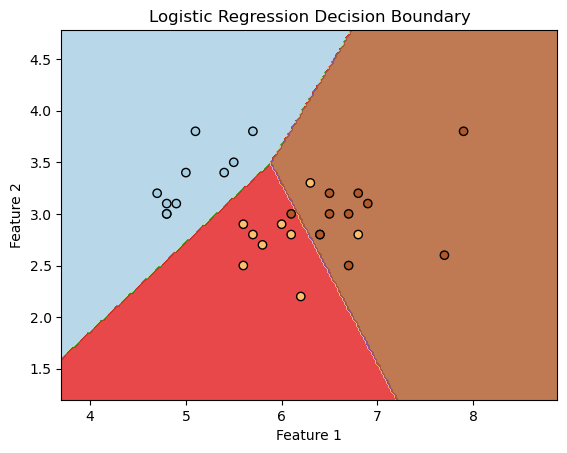

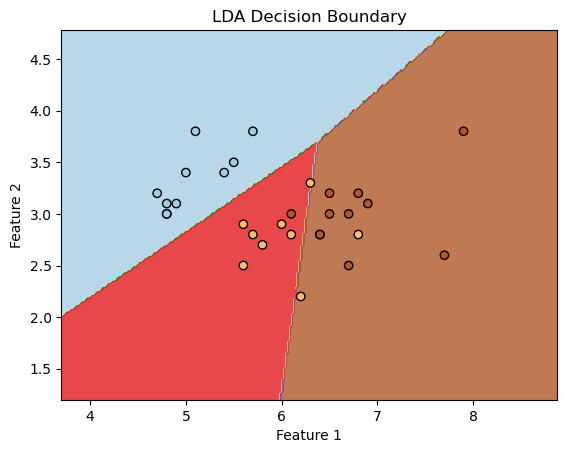

Logistic Regression Accuracy: 0.9
LDA Accuracy: 0.9


In [5]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred_logistic = logistic_reg.predict(X_test)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(logistic_reg, X_test, y_test, 'Logistic Regression Decision Boundary')
plot_decision_boundary(lda, X_test, y_test, 'LDA Decision Boundary')

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("Logistic Regression Accuracy:", accuracy_logistic)
print("LDA Accuracy:", accuracy_lda)

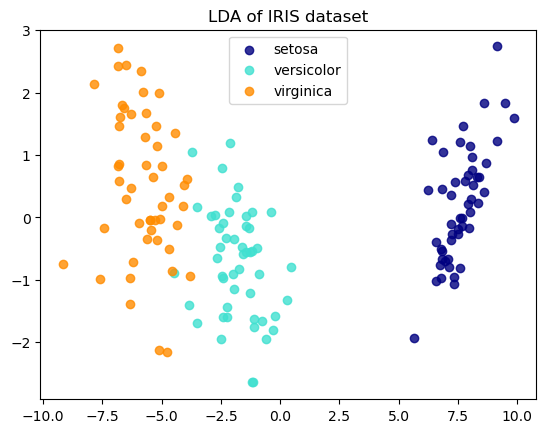

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Create an LDA model
lda = LinearDiscriminantAnalysis(n_components=2)  # You can specify the number of components for dimensionality reduction

# Fit the model to the data
X_lda = lda.fit(X, y).transform(X)

# Visualize the results
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()


# lda for binary class

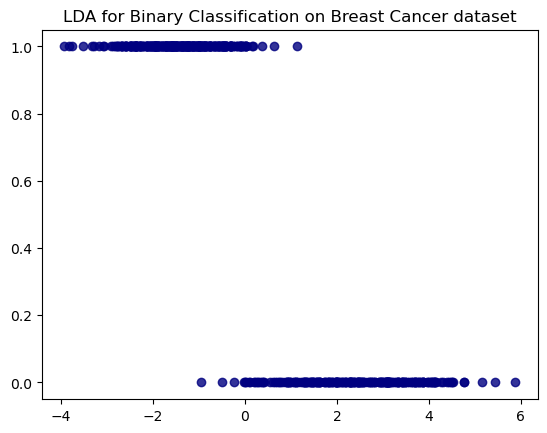

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



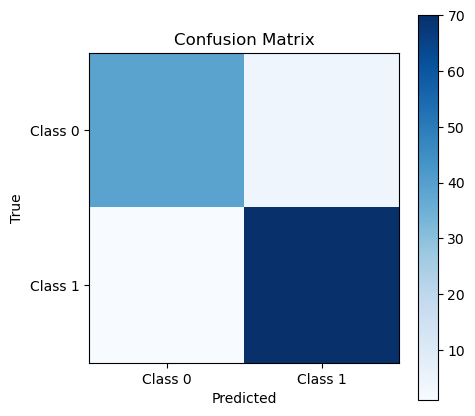

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset as an example
data = load_breast_cancer()
X = data.data
y = data.target

binary_y = (y != 0).astype(int)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, binary_y).transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, binary_y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test) 

# Visualize the results
plt.scatter(X_lda, binary_y, alpha=.8, color='navy')
plt.title('LDA for Binary Classification on Breast Cancer dataset')
plt.show()


print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()